# Task 1
The equation to fit is y = a * log(x) + b.

## Feature engineering
I first check that there is no NaN value and that there is the same number of x and y values.
I fit the equation with a linear regression model by replacing log(x) by X.
I create train and test data in order to evaluate the model. I choose train data are 80% of original data because there is only 50 data points and I keep as much data as possible for training in order to avoid overfitting.

## First model
My first model is a simple linear model, whose cost function minimize RSS. Its predictive curve has an overall good shape but it does not match precisely the desired curve: The desired curve underfits the data points. 

RSS = 1.98n R square = 0.98

I choose to evaluate the baselinethe with the mean value of the data, because I use the RSS for the cost function.
The RSS of the baseline is 107.07

## Second model
I add a regularization coefficient to the model in order to underfit training data. I use a Ridge model. I standardize x training data, as regularization needs standardized features, although in this case with only one feature, standardization does not change the result. I use a grid search to plot a validation curve and I see that the model starts to underfit around alpha = 10.

## Tuning Ridges's alpha hyperparameter 
I plot several predictive curves for log(alpha) in [0.5, 1] and I see that I get the desired curve for alpha = 5.62. For this alpha value, RSS = 3,71 and R2 = 0.96.

## Interpretation
A RSS of 3.71 ( for the second model with alpha parameter = 5.62) says that the precision is almost twice (1,87 precisely) worse than the one of the simple linear model (RSS= 1.98). This is done on purpose because I want that the model underfits the data. 

Note that this RSS is way better than the baseline (RSS= 107).

A R square of 0.96 ( for the second model with alpha parameter = 5.62) says that x values explain 96 % of y variations. It is a high percentage, so the model has a great predictability of y values: this is a good R2. However, the simple linear model has a better R2=0.98. Again this is done on purpose because the model underfits the data. 


In [8]:
#Task 1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Read data
data = pd.read_csv( 'task-1.csv')
x = data['x'].values
y = data['y'].values

#A function that computes RSS
def RSS(y, y_pred):
     return np.sum(np.square( (y - y_pred) ))

#I check x  and y have the same count number
data.describe()

,x,y
count,50.000000,50.000000
mean,75.737420,44.807340
std,66.961941,3.323212
min,10.529000,39.105000
25%,22.550250,41.584500
50%,50.149000,44.706500
75%,112.210750,48.011750
max,249.936000,51.048000


In [9]:
#I check there is no Nan values
data.isna().sum()

x    0
y    0
dtype: int64

## First Model

coef=7.79411418592876, intercept=31.52914794381889


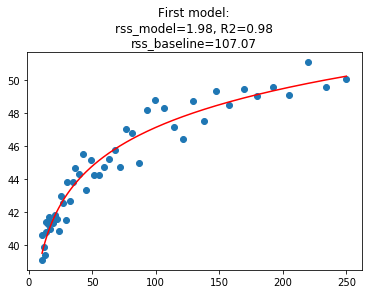

In [10]:
#Feature engineering of x 
x_log = np.log10(x)

# Create the train and test data. 
X_train, X_test, y_train, y_test = train_test_split(x_log, y, test_size=0.2, random_state=5)

#Fit a linear regression model
lr_reg = LinearRegression().fit( X_train[:, np.newaxis], y_train)

#Predict test values
y_pred = lr_reg.predict( X_test[:, np.newaxis] )

#compute RSS for model and baseline
rss_model = RSS( y_test, y_pred)
rss_baseline = RSS( y_test, y_train.mean() )

#compute r2 score of the model
r2 = r2_score(y_test, y_pred)
title = 'rss_model={:.2f}, R2={:.2f}\nrss_baseline={:.2f}'.format( rss_model, r2, rss_baseline)

print('coef={}, intercept={}'.format( lr_reg.coef_[0], lr_reg.intercept_))

#predict y values for all x train and test data
y_pred_curve = lr_reg.predict( x_log[:, np.newaxis] )

#show data points and prediction curve
plt.scatter( x, y)
plt.plot( x, y_pred_curve, c='red')
plt.title('First model:\n'+title)
plt.show()

## Second model

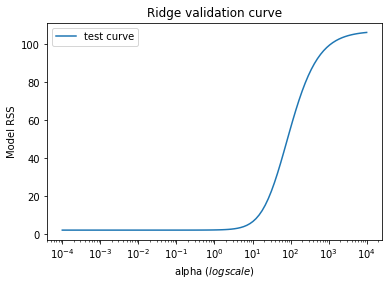

In [11]:
#Standardize x
scaler = StandardScaler()
X_train_rescaled = scaler.fit_transform( X_train[:, np.newaxis])
X_test_rescaled = scaler.transform( X_test[:, np.newaxis] )

gs_results = []

#Grid search
for alpha in np.logspace(-4,4,num=100):   
    #Ridge regression
    ridge = Ridge( alpha= alpha)
    
    #fit model
    ridge.fit( X_train_rescaled, y_train)

    #predict test values
    y_pred = ridge.predict( X_test_rescaled)

    #store results
    gs_results.append({
        'alpha': alpha,
        'rss_model': RSS(y_test, y_pred),
    })

#transform results
gs_results = pd.DataFrame(gs_results)

#plot the validation curve
plt.semilogx(gs_results['alpha'], gs_results['rss_model'], label='test curve')
plt.xlabel('alpha ($log scale)$')
plt.ylabel('Model RSS')
plt.legend()
plt.title('Ridge validation curve')
plt.show()

## Tuning of Ridges's alpha hyperparameter

rss_train=32.06, r2_train=0.93


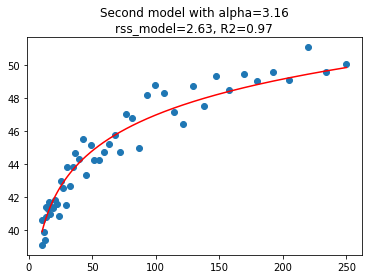

rss_train=36.04, r2_train=0.92


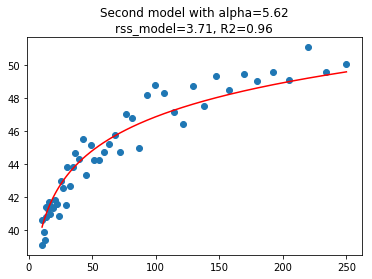

rss_train=46.11, r2_train=0.89


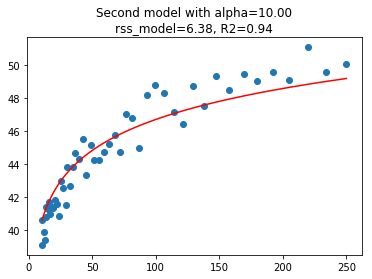

In [12]:
#alpha has a reduced range
for alpha in np.logspace(0.5, 1,num=3):   
    #Ridge
    ridge = Ridge(alpha= alpha)
    ridge.fit( X_train_rescaled, y_train)
    y_pred = ridge.predict( X_test_rescaled)
    
    rss_model = RSS(y_test, y_pred)
    r2_model= r2_score(y_test, y_pred)
    
    y_pred_train = ridge.predict( X_train_rescaled)
    rss_train = RSS(y_train, y_pred_train)
    r2_train= r2_score(y_train, y_pred_train)
    print('rss_train={:.2f}, r2_train={:.2f}'.format(rss_train, r2_train) ) 
    
    #predict y values for all x train and test data
    y_pred_curve = ridge.predict( scaler.transform( x_log[:, np.newaxis]) )

    #show data points and prediction curve
    plt.scatter( x, y)
    plt.plot( x, y_pred_curve, c='red')
    title = 'rss_model={:.2f}, R2={:.2f}'.format( rss_model, r2_model)
    plt.title('Second model with alpha={:.2f}\n'.format( alpha)+title)
    plt.show()


# Task2

## Data validation
I first check that data are valid: no NaN values, same number of rows, one data type per column.
As I have no specific information about data, I cannot evaluate if values are in a valid range.

I plot data and see that some points are aligned whereas others are scattered.

## Linear and Huber loss regression with outliers
MAE score for linear regression with outliers = 112.32

MAE score for huber loss regression with outliers = 93.83

## Linear regression without outliers
As I don't know the data, I cannot say if some values are not in a valid range and therefore outliers. So I use a statistical tool: the Inter Quantile Range (IRQ) method. 

This method is valid only if data are normaly distributed. I display violin plot for each feature: They have a normal shape and two long tails on both side, that indicates potential outliers.
I then use boxplot to better see the potential outliers.

I use the IQR method to identify outliers for each feature. Then I display data points and outliers in order to validate visually.

Afterwards I remove outliers: I merge outliers into a single list (there are 59 outliers.) and remove them from data.

Finally I show data without outliers:
- I display data points without outliers.
- I display violin plots of data without outliers: There is no more long tails on any side.

MAE score for linear regression without outliers = 53.88

## Conclusion
- MAE score for linear regression with outliers     = 112.32
- MAE score for huber loss regression with outliers =  93.83
- MAE score for linear regression without outliers  =  53.88

Linear regression is sensible to outliers. Removing outliers has improved a lot MAE score from 112 to 53, it halves the MAE score.
Huber Loss is less sensible to outliers than linear regression, it reduces their effect but it does not cancel it. 



## Data validation

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import seaborn as sns

#Read data
data = pd.read_csv( 'task-2.csv')
data.head()

#I check columns have the same number of rows
data.describe()

,x1,x2,x3,y
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,12.322190,319.329936,158.595832,2204.251068
std,8.455445,68.823726,25.032233,158.109451
min,-49.652000,-375.335000,-146.921000,1733.474000
25%,9.731500,296.804250,152.215500,2090.981000
50%,12.156500,320.857500,159.457000,2204.511000
75%,14.189250,341.749250,166.356500,2312.266000
max,100.692000,899.041000,344.797000,2713.866000


In [14]:
#I check there is only one data type in each column. 
data.dtypes

x1    float64
x2    float64
x3    float64
y     float64
dtype: object

In [15]:
#I check there is no NaN values
data.isna().sum()

x1    0
x2    0
x3    0
y     0
dtype: int64

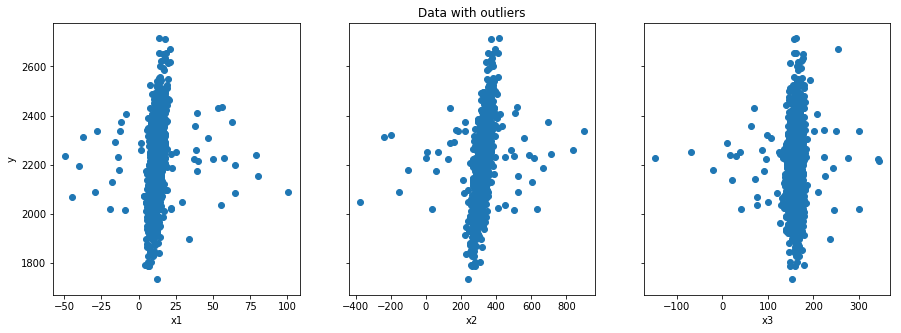

In [16]:
#I separate X and y features
X = data.drop('y', axis=1).values
y = data['y'].values

#plot the three features
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15, 5))
ax1.scatter( data.x1, y)
ax1.set_ylabel('y')
ax1.set_xlabel('x1')
ax2.scatter( data.x2, y)
ax2.set_xlabel('x2')
ax2.set_title('Data with outliers')
ax3.scatter( data.x3, y)
ax3.set_xlabel('x3')
plt.show()

## Linear and Huber loss regresion with outliers

In [17]:
# Create the train and test data. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

#Linear Regression with outliers
lr_reg = LinearRegression().fit( X_train, y_train)

#Predict test values
y_pred_lr_o = lr_reg.predict( X_test )

#compute MAE for linear regression
mae_lr_o = mean_absolute_error( y_test, y_pred_lr_o)
print('MAE linear regression with outliers = {:.2f}'.format( mae_lr_o))


#Huber loss with outliers
huber = HuberRegressor().fit(X_train, y_train)

#predict test values
y_pred_huber_o = huber.predict(X_test)

#compute MAE for huber
mae_huber_o = mean_absolute_error( y_test, y_pred_huber_o)
print('MAE huber regression with outliers = {:.2f}'.format( mae_huber_o))


MAE linear regression with outliers = 112.32
MAE huber regression with outliers = 93.83


## Linear regression without outliers

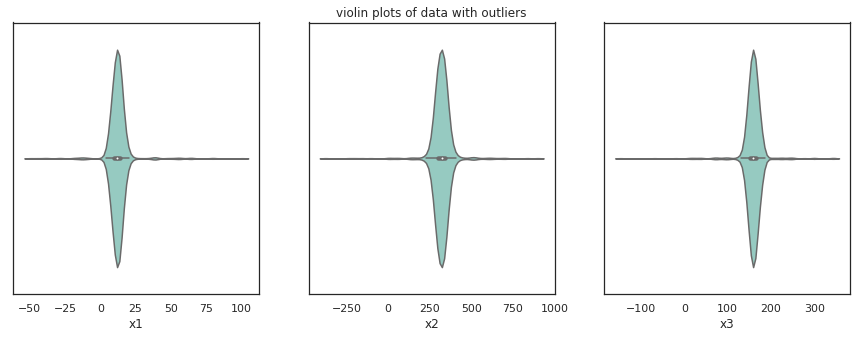

In [18]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up three matplotlib figures
f, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

# Display violin plot for each feature: The dispersion of points (kde) is symmetrics. Thee are two long tail on both side.
sns.violinplot(x=data.x1, palette='Set3', ax=axes[0])
sns.violinplot(x=data.x2, palette='Set3', ax=axes[1])
sns.violinplot(x=data.x3, palette='Set3', ax=axes[2])
axes[1].set_title('violin plots of data with outliers')
plt.show()

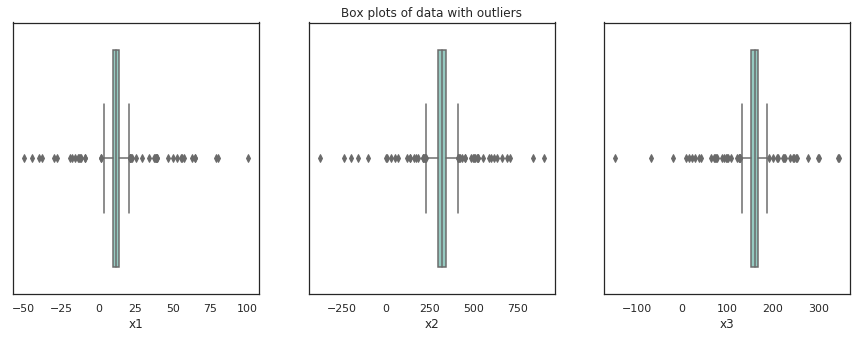

In [19]:
#I use boxplot to show more precisely potential outliers
f, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

sns.boxplot(x=data.x1, palette='Set3', ax=axes[0])
sns.boxplot(x=data.x2, palette='Set3', ax=axes[1])
sns.boxplot(x=data.x3, palette='Set3', ax=axes[2])
axes[1].set_title('Box plots of data with outliers')
plt.show()

In [20]:
# I use the IQR (Inter Quantile Range) method to remove outliers

# Define a function that returns outliers, using IQR method.
def outliers_iqr( serie):
    quartile_1, quartile_3 = np.percentile( serie, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)

    return serie[ ( serie > upper_bound) | (serie < lower_bound) ].index

# Get outliers indices
outliers_x1_idx = outliers_iqr( data.x1)
outliers_x2_idx = outliers_iqr( data.x2)
outliers_x3_idx = outliers_iqr( data.x3)

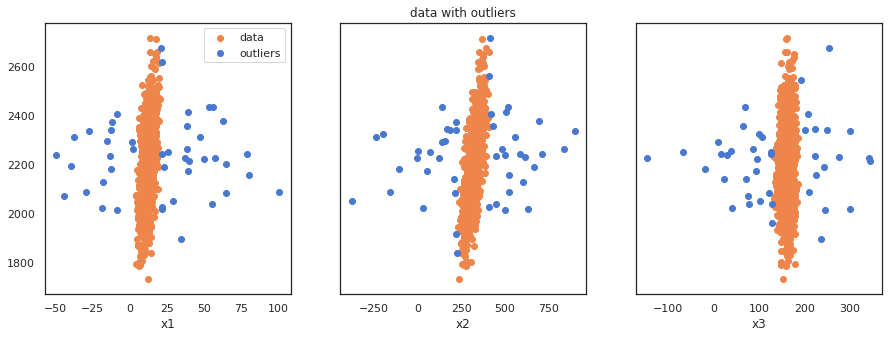

In [21]:
# Get outliers for x1, x2, x3
data_outliers_x1 = data.loc[ outliers_x1_idx]
data_outliers_x2 = data.loc[ outliers_x2_idx]
data_outliers_x3 = data.loc[ outliers_x3_idx]

# Get data without x1, x2, x3 outliers
data_no_x1 = data.drop( outliers_x1_idx)
data_no_x2 = data.drop( outliers_x2_idx)
data_no_x3 = data.drop( outliers_x3_idx)

# Display data points and outliers 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15, 5))

ax1.scatter( data_no_x1.x1, data_no_x1.y, color='C1', label='data')
ax1.scatter( data_outliers_x1.x1, data_outliers_x1.y, color='C0', label='outliers')
ax1.set_xlabel('x1')
ax1.legend()
ax2.scatter( data_no_x2.x2, data_no_x2.y, color='C1')
ax2.scatter( data_outliers_x2.x2, data_outliers_x2.y, color='C0')
ax2.set_xlabel('x2')
ax2.set_title('data with outliers')
ax3.scatter( data_no_x3.x3, data_no_x3.y, color='C1')
ax3.scatter( data_outliers_x3.x3, data_outliers_x3.y, color='C0')
ax3.set_xlabel('x3')
plt.show()

Number of outliers removed: 59


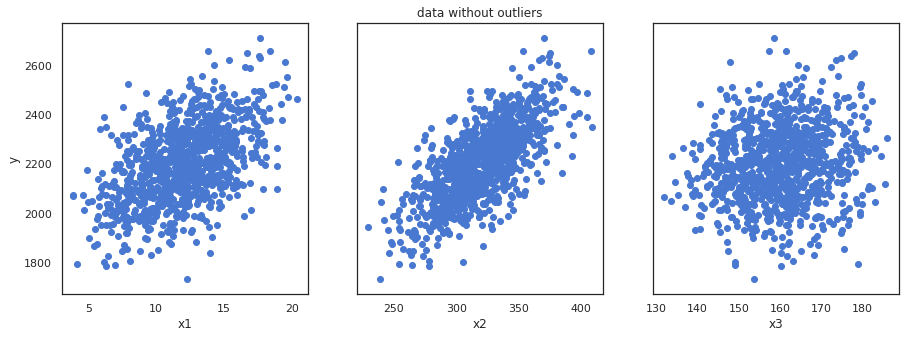

In [22]:
# Merge all outliers into a single list
outliers_idx = set(list(outliers_x1_idx) + list(outliers_x2_idx) + list(outliers_x3_idx))

# Remove all outliers from data
data_no_x1x2x3 = data.drop( outliers_idx)

print('Number of outliers removed: {}'.format( len(outliers_idx)))

#plot the three features
y = data_no_x1x2x3.y
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15, 5))
ax1.scatter( data_no_x1x2x3.x1, y)
ax1.set_ylabel('y')
ax1.set_xlabel('x1')
ax2.set_title('data without outliers')
ax2.scatter( data_no_x1x2x3.x2, y)
ax2.set_xlabel('x2')
ax3.scatter( data_no_x1x2x3.x3, y)
ax3.set_xlabel('x3')
plt.show()

Text(0.5, 1.0, 'violin plots of data without outliers')

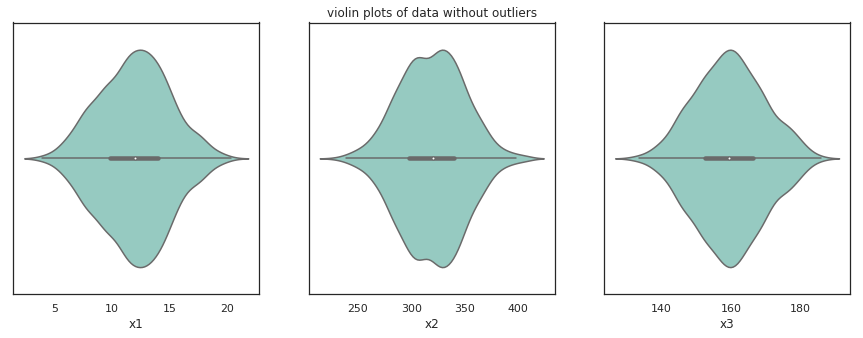

In [23]:
# Display violin plot for data without outliers
f, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

ax = sns.violinplot(x=data_no_x1x2x3.x1, palette='Set3', ax=axes[0])
ax = sns.violinplot(x=data_no_x1x2x3.x2, palette='Set3', ax=axes[1])
ax = sns.violinplot(x=data_no_x1x2x3.x3, palette='Set3', ax=axes[2])
axes[1].set_title('violin plots of data without outliers')

In [24]:
# Linear regression without outliers

# Separate X and y features
X = data_no_x1x2x3.drop('y', axis=1).values
y = data_no_x1x2x3['y'].values

# Create the train and test data. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

#Linear Regression without outliers
lr_reg_wo = LinearRegression().fit( X_train, y_train)

#Predict test values
y_pred_lr_wo = lr_reg_wo.predict( X_test )

#compute MAE for linear regression
mae_lr_wo = mean_absolute_error( y_test, y_pred_lr_wo)
print('MAE linear regression with outliers = {:.2f}'.format( mae_lr_wo))

MAE linear regression with outliers = 53.88


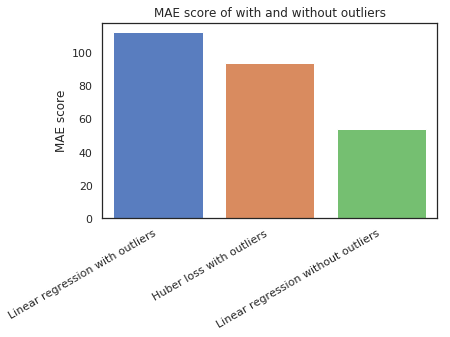

In [25]:
# Conclusion

# Display MAE score for the three models
mae_df = pd.DataFrame({'regression': ['Linear regression with outliers', 'Huber loss with outliers', 'Linear regression without outliers'], 
                       'mae': [ mae_lr_o, mae_huber_o, mae_lr_wo]})

ax = sns.barplot(y = 'mae', x = 'regression', data = mae_df, palette="muted")
ax.set( xlabel= '', ylabel='MAE score', title='MAE score of with and without outliers')

#label do not overlap
ax.figure.autofmt_xdate()
plt.show()